In [1]:
import numpy as np
import pandas as pd
import tqdm

# tqdm.__version__
# from tqdm import tqdm
# tqdm.pandas()

In [2]:
df=pd.read_csv('/scratch/ss4yd/logs_only_vit_bert_fullexpv2_freezeFalse/my_model/version_23/saved_test.csv')
df

,preds,target,pred_w_sp_tokens
0,this is a heart - left ventricle tissue from a...,this is a heart - left ventricle tissue from a...,[CLS] this is a heart - left ventricle tissue ...
1,this is a heart - atrial appendage tissue from...,this is a heart - atrial appendage tissue from...,[CLS] this is a heart - atrial appendage tissu...
2,this is a breast - mammary tissue tissue from ...,this is a breast - mammary tissue tissue from ...,[CLS] this is a breast - mammary tissue tissue...
3,this is a skin - sun exposed ( lower leg ) tis...,this is a skin - sun exposed ( lower leg ) tis...,[CLS] this is a skin - sun exposed ( lower leg...
4,this is a esophagus - mucosa tissue from a mal...,this is a esophagus - mucosa tissue from a mal...,[CLS] this is a esophagus - mucosa tissue from...
...,...,...,...
1251,this is a artery - tibial tissue from a male p...,this is a artery - tibial tissue from a female...,[CLS] this is a artery - tibial tissue from a ...
1252,this is a skin - sun exposed ( lower leg ) tis...,this is a skin - sun exposed ( lower leg ) tis...,[CLS] this is a skin - sun exposed ( lower leg...
1253,this is a esophagus - mucosa tissue from a mal...,this is a esophagus - mucosa tissue from a fem...,[CLS] this is a esophagus - mucosa tissue from...
1254,this is a esophagus - gastroesophageal junctio...,this is a esophagus - gastroesophageal junctio...,[CLS] this is a esophagus - gastroesophageal j...


In [3]:
# df['preds'].progress_apply(lambda x: 'new'+x)

## Tissue Type Accuracy

In [3]:
pred_tissue=list(df.preds.apply(lambda x: x[10:x.find('tissue from')-1]))
pred_tissue

target_tissue=list(df.target.apply(lambda x: x[10:x.find('tissue from')-1]))
target_tissue

comp = [1 if x==y else 0 for x,y in zip(pred_tissue, target_tissue)]

print(f'Tissue Type Accuracy: {np.sum(comp)*100/len(comp):0.2f}%')

Tissue Type Accuracy: 81.53%


In [4]:
# pd.Series(target_tissue).value_counts(), 
len(pd.Series(target_tissue).value_counts())

39

In [5]:
pd.Series(pred_tissue).value_counts(), len(pd.Series(pred_tissue).value_counts())

(artery - tibial                          75
 esophagus - mucosa                       68
 nerve - tibial                           62
 esophagus - muscularis                   57
 adipose - visceral ( omentum )           56
 breast - mammary tissue                  54
 skin - sun exposed ( lower leg )         54
 muscle - skeletal                        52
 artery - coronary                        51
 pancreas                                 41
 colon - sigmoid                          41
 thyroid                                  41
 colon - transverse                       40
 heart - left ventricle                   39
 spleen                                   37
 lung                                     37
 testis                                   37
 adrenal gland                            36
 esophagus - gastroesophageal junction    34
 stomach                                  33
 pituitary                                30
 heart - atrial appendage                 30
 small int

## Gender accuracy

In [6]:
df.preds[0][df.preds[0].find('from')+7:df.preds[0].find('patient')-1]

'male'

In [7]:
df.preds[2][df.preds[2].find('from')+7:df.preds[2].find('patient')-1]

'male'

In [8]:
pred_gender=list(df.preds.apply(lambda x: x[x.find('from')+7:x.find('patient')-1]))
target_gender=list(df.target.apply(lambda x: x[x.find('from')+7:x.find('patient')-1]))
comp = [1 if x==y else 0 for x,y in zip(pred_gender, target_gender)]

print(f'Gender Accuracy: {np.sum(comp)*100/len(comp):0.2f}%')

Gender Accuracy: 70.22%


In [14]:
# target_gender

In [9]:
tdf=pd.DataFrame()
tdf['pred_gender']=pred_gender
tdf['target_gender']=target_gender
tdf['pred_tissue']=pred_tissue
tdf['target_tissue']=target_tissue
tdf

,pred_gender,target_gender,pred_tissue,target_tissue
0,male,female,heart - left ventricle,heart - left ventricle
1,male,female,heart - atrial appendage,heart - atrial appendage
2,male,female,breast - mammary tissue,breast - mammary tissue
3,male,male,skin - sun exposed ( lower leg ),skin - sun exposed ( lower leg )
4,male,male,esophagus - mucosa,esophagus - mucosa
...,...,...,...,...
1251,male,female,artery - tibial,artery - tibial
1252,male,female,skin - sun exposed ( lower leg ),skin - sun exposed ( lower leg )
1253,male,female,esophagus - mucosa,esophagus - mucosa
1254,male,male,esophagus - gastroesophageal junction,esophagus - gastroesophageal junction


In [10]:
pd.Series(target_gender).value_counts()

male      834
female    422
dtype: int64

In [11]:
pd.Series(pred_gender).value_counts()

male      1202
female      54
dtype: int64

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

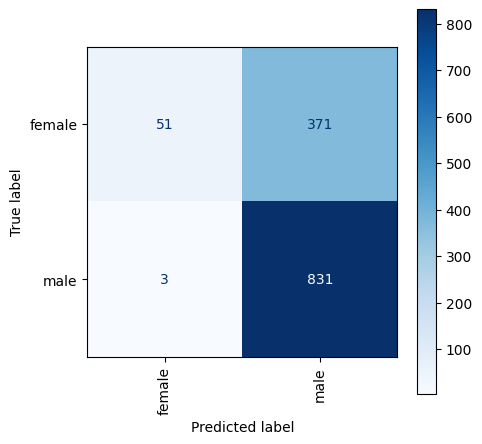

In [13]:
confusion_matrix(target_gender, pred_gender)
f,ax = plt.subplots(1,1,figsize=(5,5))
ConfusionMatrixDisplay.from_predictions(target_gender, pred_gender, xticks_rotation='vertical', ax=ax,cmap='Blues')
plt.show()

In [14]:
conf=confusion_matrix(target_tissue, pred_tissue)

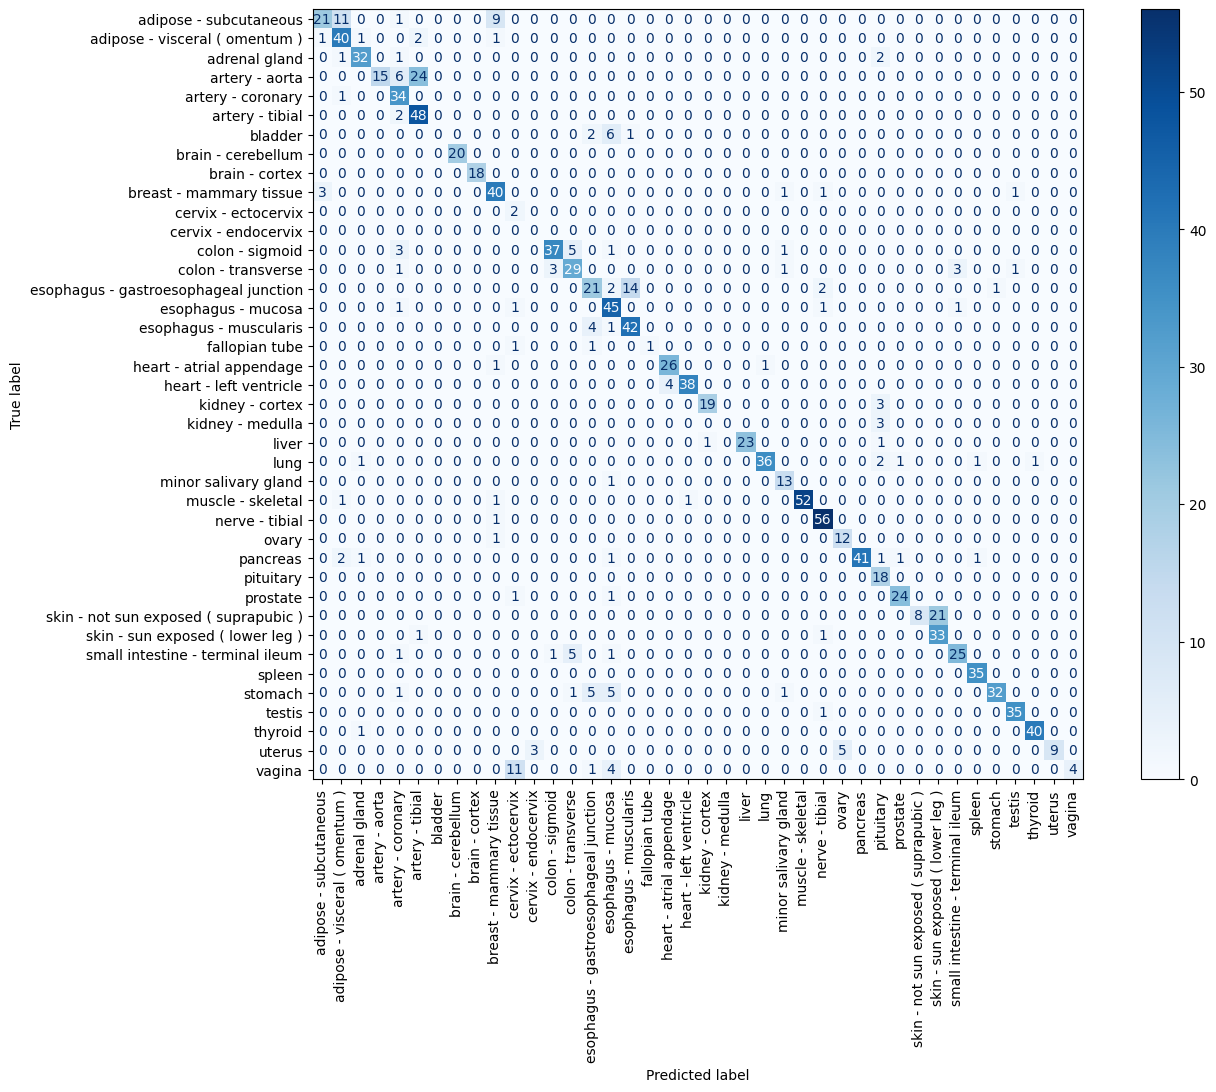

In [15]:
f,ax = plt.subplots(1,1,figsize=(15,10))
ConfusionMatrixDisplay.from_predictions(target_tissue, pred_tissue, xticks_rotation='vertical', ax=ax,cmap='Blues')
plt.show()

## NLP Metrics

In [55]:
from torchmetrics.functional.text import rouge_score, bleu_score

prds = df.pred_w_sp_tokens.apply(lambda x: x[6:x.find('[SEP]')-1])
targets = df.target

In [56]:
bleu_score(prds, [[x] for x in targets])

tensor(0.5661)

In [57]:
rouge_score(prds, [[x] for x in targets])

{'rouge1_fmeasure': tensor(0.7558),
 'rouge1_precision': tensor(0.7992),
 'rouge1_recall': tensor(0.7306),
 'rouge2_fmeasure': tensor(0.6853),
 'rouge2_precision': tensor(0.7259),
 'rouge2_recall': tensor(0.6627),
 'rougeL_fmeasure': tensor(0.7520),
 'rougeL_precision': tensor(0.7951),
 'rougeL_recall': tensor(0.7271),
 'rougeLsum_fmeasure': tensor(0.7524),
 'rougeLsum_precision': tensor(0.7955),
 'rougeLsum_recall': tensor(0.7274)}

In [58]:
phrase='and it has'

In [59]:
prds[0].find(phrase)+len(phrase)

70

In [60]:
prds[0][prds[0].find(phrase)+len(phrase)+1:]

'2 pieces ; interstitial fibrosis and scarring ( outlined )'

In [61]:
prds_trad=[x[x.find(phrase)+len(phrase)+1:] for x in prds]
prds_trad

['2 pieces ; interstitial fibrosis and scarring ( outlined )',
 '2 pieces ; 1 piece has 20 % fat',
 '2 pieces ; fibrocollagenous stroma and ductal structures ( outlined )',
 '6 pieces, squamous epithelium is ~ 50 - 60 microns',
 '6 pieces, squamous mucosa is ~ 0. 2mm, ~ 20 % thickness',
 '2 pieces ; interstitial fibrosis and scarring ( arrows )',
 '2 pieces ; well trimmed',
 '6 pieces ; mucosa is largely sloughed',
 '6 pieces ; atherosclerosis',
 '2 pieces ; cortex and medulla',
 '6 pieces, squamous epithelium is ~ 50 microns',
 '6 pieces ; atherosclerosis',
 '2 pieces ; glandular component with sloughed epithelium',
 '2 pieces, spermatogenesis is present',
 '6 pieces ; glomeruli in all sections, arteriolonephrosclerosis, tubules autolyzed',
 '2 pieces, moderate congestion',
 '6 pieces ; well trimmed muscle',
 '4 pieces',
 '2 pieces, moderate congestion',
 '6 pieces, squamous mucosa is ~ 0. 5mm, ~ 20 % thickness',
 '4 pieces',
 '2 pieces, myometrium only',
 '4 pieces ; autolyzed mucosa

In [62]:
targets_trad=[x[x.find(phrase)+len(phrase)+1:] for x in targets]
targets_trad

['2 pieces, minimal interstitial fibrosis, chronic ischemic changes',
 '2 pieces, no abnormalities',
 '2 pieces ; 50 and 70 % fat with fibrocollagenous stroma with benign ducts and lobules',
 '6 pieces ; 20 % dermal fat ; well trimmed',
 '6 pieces ; includes few clusters of submucosal glands',
 '2 pieces ; foci of hypereosinophilic myofibers consistent with ischemia',
 '2 pieces, prominent monckeberg medial sclerosis, rep delineated ; ~ 40 % occlusve atherosis',
 '6 pieces ; squamous epithelium partially sloughed',
 '6 pieces, trace ahdherent serosa',
 '2 pieces, mainly cortex but a ~ 3x0. 8mm focus of medulla is present ( delineated ) - - valuable specimen, well preserved',
 '6 pieces, 5 - 10 % attached and internal adipose tissue, squamous epithelium measures 30 - 40 microns in thickness',
 '6 pieces ; mild atheromatous change',
 '6 pieces, testis, pronounced tubular hyalinization, 50 % rete testis, viable islands of non hyperplastic leydig cells, switched with 3325',
 '2 pieces, spe

In [66]:
bleu_score(prds_trad, [x for x in targets_trad], smooth=True)

tensor(0.0863)

In [67]:
bleu_score(prds_trad, [[x] for x in targets_trad], n_gram=3, smooth=False)

tensor(0.1238)

In [68]:
bleu_score(prds_trad, [[x] for x in targets_trad], n_gram=2, smooth=False)

tensor(0.1746)

In [69]:
bleu_score(prds_trad, [[x] for x in targets_trad], n_gram=1, smooth=False)

tensor(0.2579)

In [70]:
rouge_score(prds_trad, [[x] for x in targets_trad])

{'rouge1_fmeasure': tensor(0.4141),
 'rouge1_precision': tensor(0.4861),
 'rouge1_recall': tensor(0.4074),
 'rouge2_fmeasure': tensor(0.2351),
 'rouge2_precision': tensor(0.2800),
 'rouge2_recall': tensor(0.2445),
 'rougeL_fmeasure': tensor(0.4075),
 'rougeL_precision': tensor(0.4777),
 'rougeL_recall': tensor(0.4016),
 'rougeLsum_fmeasure': tensor(0.4086),
 'rougeLsum_precision': tensor(0.4791),
 'rougeLsum_recall': tensor(0.4025)}

## Comparison with PathCap

In [71]:
from utils import read_json

word_map=read_json('../new_lstm_decoder/data_files/word_map.json')
rev_word_map={v:k for k,v in word_map.items()}
len(word_map)

975

In [72]:
import nltk

In [73]:
df['target_trad'] = targets_trad
tcaps = list(df.target_trad.apply(lambda x: nltk.tokenize.word_tokenize(str(x).lower())))
tcaps

[['2',
  'pieces',
  ',',
  'minimal',
  'interstitial',
  'fibrosis',
  ',',
  'chronic',
  'ischemic',
  'changes'],
 ['2', 'pieces', ',', 'no', 'abnormalities'],
 ['2',
  'pieces',
  ';',
  '50',
  'and',
  '70',
  '%',
  'fat',
  'with',
  'fibrocollagenous',
  'stroma',
  'with',
  'benign',
  'ducts',
  'and',
  'lobules'],
 ['6', 'pieces', ';', '20', '%', 'dermal', 'fat', ';', 'well', 'trimmed'],
 ['6',
  'pieces',
  ';',
  'includes',
  'few',
  'clusters',
  'of',
  'submucosal',
  'glands'],
 ['2',
  'pieces',
  ';',
  'foci',
  'of',
  'hypereosinophilic',
  'myofibers',
  'consistent',
  'with',
  'ischemia'],
 ['2',
  'pieces',
  ',',
  'prominent',
  'monckeberg',
  'medial',
  'sclerosis',
  ',',
  'rep',
  'delineated',
  ';',
  '~',
  '40',
  '%',
  'occlusve',
  'atherosis'],
 ['6', 'pieces', ';', 'squamous', 'epithelium', 'partially', 'sloughed'],
 ['6', 'pieces', ',', 'trace', 'ahdherent', 'serosa'],
 ['2',
  'pieces',
  ',',
  'mainly',
  'cortex',
  'but',
  'a',


In [74]:
enc_captions=[]
for cap in tcaps:
    enc_c = [word_map.get(word, word_map['<unk>']) for word in cap]
    enc_t = [rev_word_map.get(i) for i in enc_c]
    enc_captions.append(enc_t)

In [75]:
df['pred_trad']=prds_trad
df

,preds,target,pred_w_sp_tokens,target_trad,pred_trad
0,this is a heart - left ventricle tissue from a...,this is a heart - left ventricle tissue from a...,[CLS] this is a heart - left ventricle tissue ...,"2 pieces, minimal interstitial fibrosis, chron...",2 pieces ; interstitial fibrosis and scarring ...
1,this is a heart - atrial appendage tissue from...,this is a heart - atrial appendage tissue from...,[CLS] this is a heart - atrial appendage tissu...,"2 pieces, no abnormalities",2 pieces ; 1 piece has 20 % fat
2,this is a breast - mammary tissue tissue from ...,this is a breast - mammary tissue tissue from ...,[CLS] this is a breast - mammary tissue tissue...,2 pieces ; 50 and 70 % fat with fibrocollageno...,2 pieces ; fibrocollagenous stroma and ductal ...
3,this is a skin - sun exposed ( lower leg ) tis...,this is a skin - sun exposed ( lower leg ) tis...,[CLS] this is a skin - sun exposed ( lower leg...,6 pieces ; 20 % dermal fat ; well trimmed,"6 pieces, squamous epithelium is ~ 50 - 60 mic..."
4,this is a esophagus - mucosa tissue from a mal...,this is a esophagus - mucosa tissue from a mal...,[CLS] this is a esophagus - mucosa tissue from...,6 pieces ; includes few clusters of submucosal...,"6 pieces, squamous mucosa is ~ 0. 2mm, ~ 20 % ..."
...,...,...,...,...,...
1251,this is a artery - tibial tissue from a male p...,this is a artery - tibial tissue from a female...,[CLS] this is a artery - tibial tissue from a ...,"2 pieces, 3x2. 5 & 4x3mm ; one aliquot has ~ 0...",2 pieces ; well trimmed
1252,this is a skin - sun exposed ( lower leg ) tis...,this is a skin - sun exposed ( lower leg ) tis...,[CLS] this is a skin - sun exposed ( lower leg...,"6 pieces ; relatively well trimmed, include up...","6 pieces, squamous epithelium is ~ 50 - 60 mic..."
1253,this is a esophagus - mucosa tissue from a mal...,this is a esophagus - mucosa tissue from a fem...,[CLS] this is a esophagus - mucosa tissue from...,6 pieces,"6 pieces, squamous mucosa is ~ 0. 5mm, ~ 20 - ..."
1254,this is a esophagus - gastroesophageal junctio...,this is a esophagus - gastroesophageal junctio...,[CLS] this is a esophagus - gastroesophageal j...,5 pieces ; 2 have 10 & 20 % stromal contents,"6 pieces, confirmed target muscularis"


In [76]:
precaps = list(df.pred_trad.apply(lambda x: nltk.tokenize.word_tokenize(str(x).lower())))
enc_preds=[]
for cap in precaps:
    enc_c = [word_map.get(word, word_map['<unk>']) for word in cap]
    enc_t = [rev_word_map.get(i) for i in enc_c]
    enc_preds.append(enc_t)

In [77]:
preds_trad=[' '.join(x) for x in enc_preds]
preds_trad

['2 pieces ; interstitial fibrosis and scarring ( outlined )',
 '2 pieces ; 1 piece has 20 % fat',
 '2 pieces ; fibrocollagenous stroma and ductal structures ( outlined )',
 '6 pieces , squamous epithelium is ~ 50 - 60 microns',
 '6 pieces , squamous mucosa is ~ 0 . 2mm , ~ 20 % thickness',
 '2 pieces ; interstitial fibrosis and scarring ( arrows )',
 '2 pieces ; well trimmed',
 '6 pieces ; mucosa is largely sloughed',
 '6 pieces ; atherosclerosis',
 '2 pieces ; cortex and medulla',
 '6 pieces , squamous epithelium is ~ 50 microns',
 '6 pieces ; atherosclerosis',
 '2 pieces ; glandular component with sloughed epithelium',
 '2 pieces , spermatogenesis is present',
 '6 pieces ; glomeruli in all sections , <unk> , tubules autolyzed',
 '2 pieces , moderate congestion',
 '6 pieces ; well trimmed muscle',
 '4 pieces',
 '2 pieces , moderate congestion',
 '6 pieces , squamous mucosa is ~ 0 . 5mm , ~ 20 % thickness',
 '4 pieces',
 '2 pieces , myometrium only',
 '4 pieces ; autolyzed mucosa and 

In [78]:
target_trad=[[' '.join(x)] for x in enc_captions]
target_trad

[['2 pieces , minimal interstitial fibrosis , chronic ischemic changes'],
 ['2 pieces , no abnormalities'],
 ['2 pieces ; 50 and 70 % fat with fibrocollagenous stroma with <unk> ducts and lobules'],
 ['6 pieces ; 20 % dermal fat ; well trimmed'],
 ['6 pieces ; includes few clusters of submucosal glands'],
 ['2 pieces ; foci of <unk> myofibers consistent with ischemia'],
 ['2 pieces , prominent monckeberg medial sclerosis , rep delineated ; ~ 40 % <unk> atherosis'],
 ['6 pieces ; squamous epithelium partially sloughed'],
 ['6 pieces , trace <unk> serosa'],
 ['2 pieces , mainly cortex but a ~ <unk> . <unk> focus of medulla is present ( delineated ) - - valuable specimen , well preserved'],
 ['6 pieces , 5 - 10 % attached and internal adipose tissue , squamous epithelium measures 30 - 40 microns in thickness'],
 ['6 pieces ; mild atheromatous change'],
 ['6 pieces , <unk> , <unk> tubular <unk> , 50 % <unk> <unk> , <unk> <unk> of <unk> hyperplastic leydig cells , switched with <unk>'],
 ['

In [79]:
bleu_score(preds_trad, target_trad, smooth=True)

tensor(0.1181)

In [80]:
rouge_score(preds_trad, target_trad)

{'rouge1_fmeasure': tensor(0.4151),
 'rouge1_precision': tensor(0.4877),
 'rouge1_recall': tensor(0.4096),
 'rouge2_fmeasure': tensor(0.2347),
 'rouge2_precision': tensor(0.2800),
 'rouge2_recall': tensor(0.2447),
 'rougeL_fmeasure': tensor(0.4076),
 'rougeL_precision': tensor(0.4781),
 'rougeL_recall': tensor(0.4030),
 'rougeLsum_fmeasure': tensor(0.4089),
 'rougeLsum_precision': tensor(0.4797),
 'rougeLsum_recall': tensor(0.4040)}